# HuangPu: Generate PDF report of stocks

## Import

Libraries

In [1]:
from utils.init import *

from utils.analyse_price import *
from utils.analyse_fundamentals import *
from utils.data import *
from utils.params import *
from utils.pdf import *

## SET REPORT PARAMETERS

In [ ]:
# Please change to the name and market of the stock you want to analyse
TICKER = 'SPY'
MARKET = 'US'

## Get data

Run data

In [3]:
historical_prices_dict = {}

last_end_of_quarter = nearest_three_month()
first_end_of_quarter = get_first_end_of_quarter(last_end_of_quarter)

print('First end of quarter:', first_end_of_quarter,
      '; Last end of quarter:', last_end_of_quarter)

First end of quarter: 2019-12 ; Last end of quarter: 2024-12


76
Utilities UtilitiesIndependentPowerProducers


,ASX code,Market Cap,weight
1319,ORG,1.917418e+10,0.327861
1117,MEZ,1.357866e+10,0.232183
150,APA,8.961066e+09,0.153226
1105,MCY,7.515177e+09,0.128503
405,CEN,6.846381e+09,0.117067
781,GNE,2.149560e+09,0.036756
1026,LGI,2.575454e+08,0.004404


,ASX code,Market Cap ($bn)
84,AGL,7.52


0.13


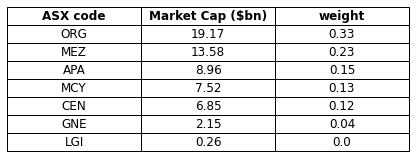

$LGI.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$LGI.AX: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577797200, endDate = 1609333200")
$LGI.AX: possibly delisted; no price data found  (1d 2021-01-01 -> 2021-12-31) (Yahoo error = "Data doesn't exist for startDate = 1609419600, endDate = 1640869200")


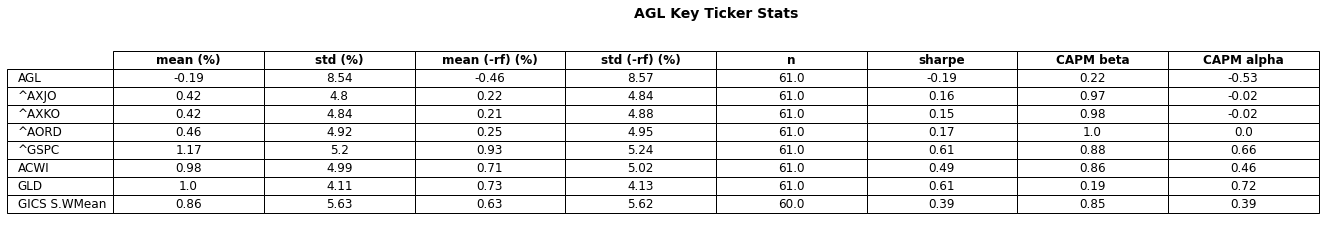

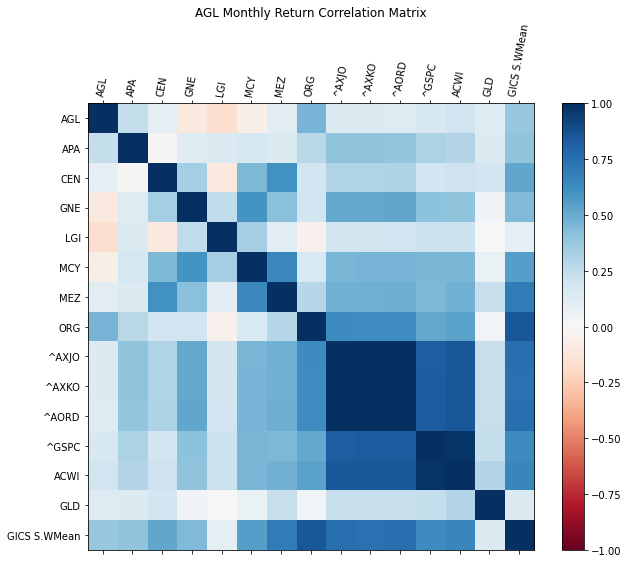

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


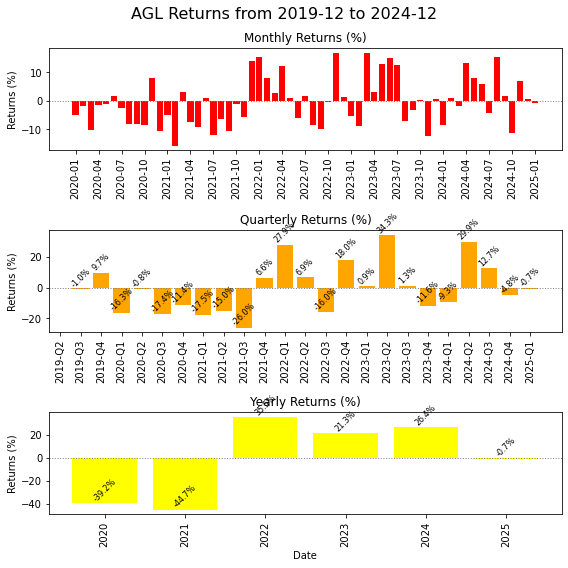

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


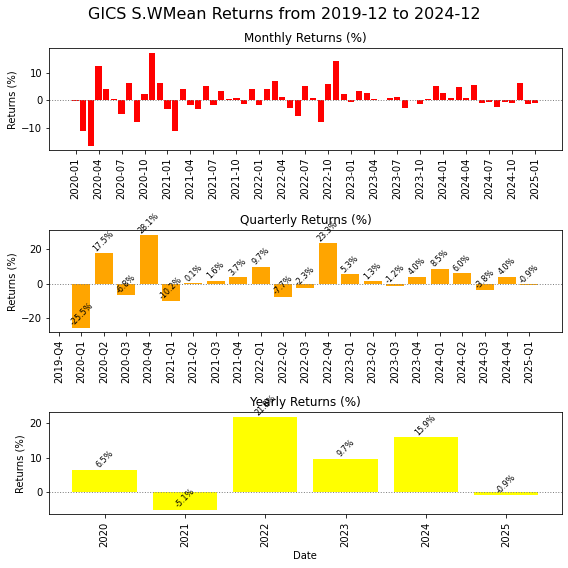

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


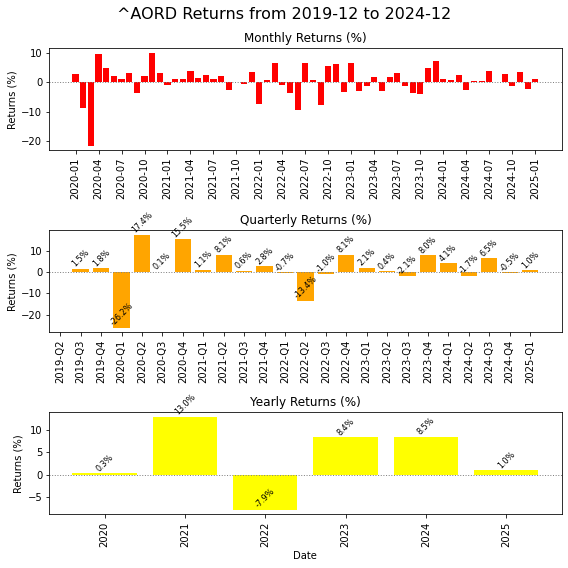

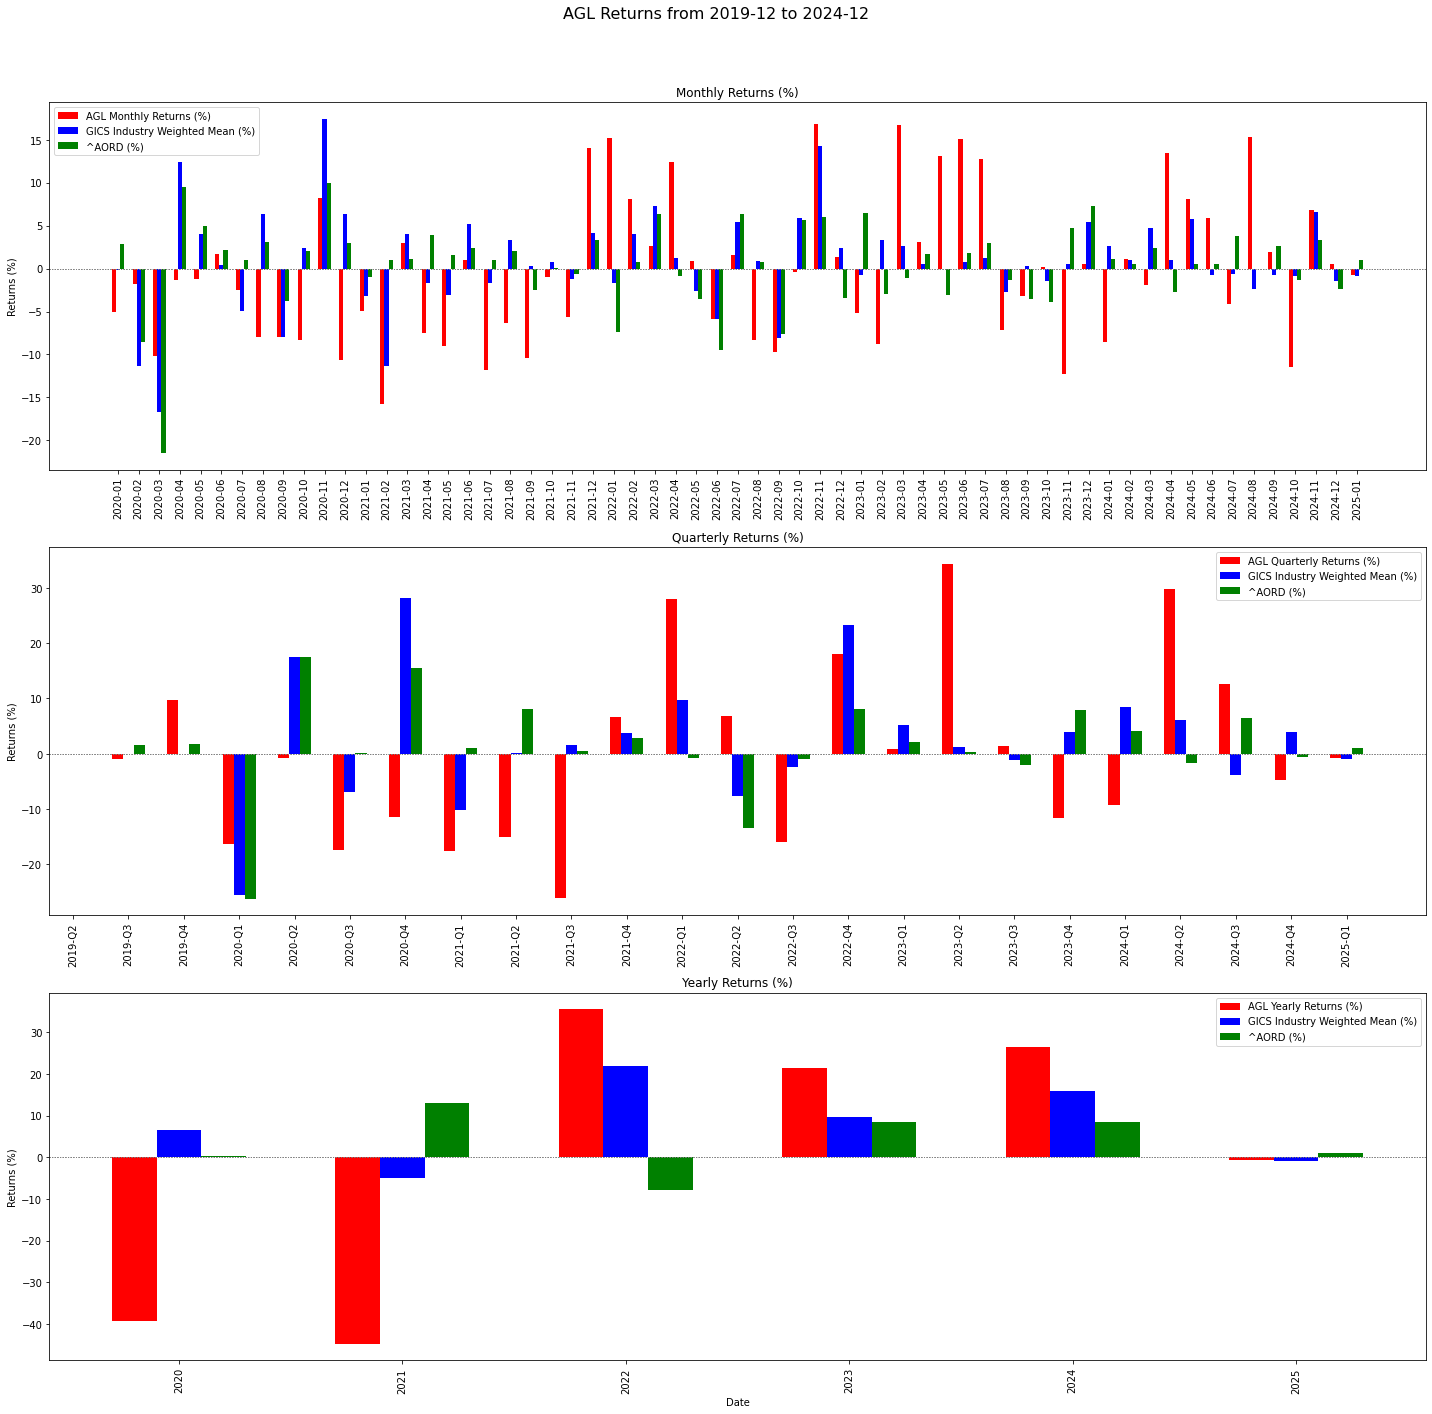

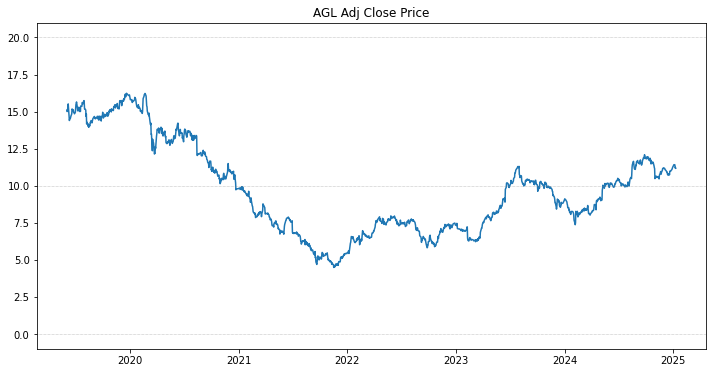

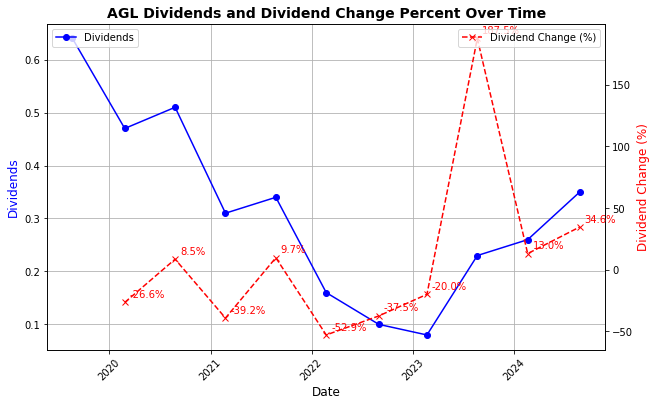

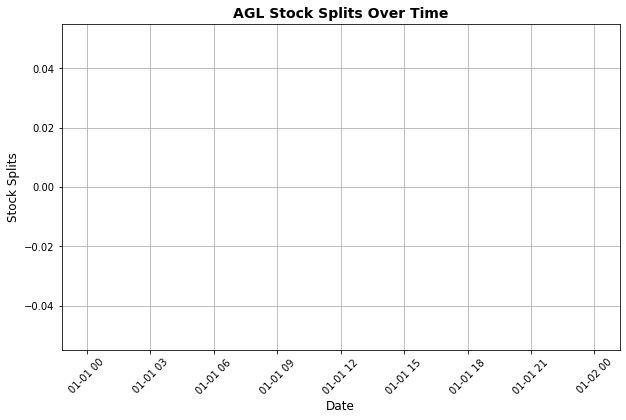

In [4]:
# read in data
index_tickers_list = get_index_tickers_list(MARKET)
interest_rate_df_dict = get_interest_rate(MARKET)

comparable_tickers = {'type': {}, 'list': []}
if MARKET == 'AU':
    asx_companies_directory_df = get_asx_companies_directory()
    asx_gics_df = get_asx_gics()

    # get same gics tickers
    AU_top_list_dict = get_top_ASX_companies_list(asx_companies_directory_df)
    ASX_ticker_gics_dict = get_ASX_ticker_gics(TICKER, asx_gics_df)
    same_gics_ASX_tickers_dict = get_same_gics_ASX_tickers(asx_gics_df,
                                                           ASX_ticker_gics_dict, AU_top_list_dict)

    comparable_ASX_tickers_dict = get_comparable_ASX_tickers(
        TICKER, same_gics_ASX_tickers_dict)
    if ASX_ticker_gics_dict['Sector'] is not 'Unknown':
        market_value_rank = get_market_value_rank(
            TICKER, asx_gics_df)
        print(market_value_rank,)
    print(
        ASX_ticker_gics_dict['Sector'], ASX_ticker_gics_dict['Industry'])

    same_industry_ASX_tickers_mcap_df = get_same_gics_ASX_MCap_weights(TICKER,
                                                                       asx_companies_directory_df, comparable_ASX_tickers_dict)

    # market value and weight
    same_industry_tickers_mcap_df = get_same_industry_tickers_mcap(
        same_industry_ASX_tickers_mcap_df)
    display(same_industry_tickers_mcap_df)

    ticker_mv_df = get_AU_ticker_mv_df(asx_companies_directory_df, TICKER)
    display(ticker_mv_df)

    ticker_proportion_of_market = get_AU_ticker_proportion_of_market(
        ticker_mv_df, same_industry_tickers_mcap_df)
    print(round(ticker_proportion_of_market, 2))

    plot_gics_mcap_weights(TICKER, same_industry_tickers_mcap_df)

    same_gics_industry_weight_dict = get_same_AU_gics_industry_weight_dict(
        same_industry_tickers_mcap_df)

# get historic prices
analysis_needed_ticker_list = get_analysis_needed_ticker_list(
    TICKER, index_tickers_list, comparable_ASX_tickers_dict if MARKET == 'AU' else comparable_tickers)
historical_prices_dict = get_historical_prices_for_interested_list(
    analysis_needed_ticker_list, index_tickers_list, historical_prices_dict, MARKET)

# get historical returns
monthly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    monthly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['monthly'], 'M')

quarterly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    quarterly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['quarterly'], 'Q')

yearly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    yearly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['annualy'], 'Y')

# get GICS industry weighted returns
monthly_returns_df_dict = get_gics_industry_weighted_mean(
    monthly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if MARKET == 'AU' else None,
    index_tickers_list, 'M', comparable_tickers=comparable_ASX_tickers_dict if MARKET == 'AU' else comparable_tickers)
quarterly_returns_df_dict = get_gics_industry_weighted_mean(
    quarterly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if MARKET == 'AU' else None,
    index_tickers_list, 'Q', comparable_tickers=comparable_ASX_tickers_dict if MARKET == 'AU' else comparable_tickers)
yearly_returns_df_dict = get_gics_industry_weighted_mean(
    yearly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if MARKET == 'AU' else None,
    index_tickers_list, 'Y', comparable_tickers=comparable_ASX_tickers_dict if MARKET == 'AU' else comparable_tickers)

# get stats based on returns
stats_df = get_monthly_stats_for_all_tickers(
    monthly_returns_df_dict, comparable_ASX_tickers_dict if MARKET == 'AU' else comparable_tickers, index_tickers_list, same_industry_ASX_tickers_mcap_df if TICKER == 'AU' else None, TICKER, first_end_of_quarter, last_end_of_quarter, MARKET)
plot_key_ticker_stats_table(
    stats_df, TICKER, comparable_ASX_tickers_dict if MARKET == 'AU' else comparable_tickers, index_tickers_list)

# correlation chart
correlation_df, period_of_interest_return_df = historical_corr(
    monthly_returns_df_dict, first_end_of_quarter, last_end_of_quarter)
plot_correlation(correlation_df, ticker=TICKER)

# plot returns
# interested ticker
plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': TICKER,
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

if MARKET == 'AU' and len(comparable_ASX_tickers_dict['list']) > 0:
    plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                    'quarterly_returns_df_dict': quarterly_returns_df_dict,
                    'yearly_returns_df_dict': yearly_returns_df_dict,
                    'ticker': 'GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else 'GICS S.WMean',
                    'first_end_of_quarter': first_end_of_quarter,
                    'last_end_of_quarter': last_end_of_quarter,
                    'underlying_ticker': TICKER})

plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': '^AORD' if MARKET == 'AU' else '^GSPC' if MARKET == 'US' else '^HSI' if MARKET == 'HK' else '000300.SS' if MARKET == 'CN' else 'ACWI' if MARKET == 'MSCI' else None,
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

plot_returns_comparative(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                            'quarterly_returns_df_dict': quarterly_returns_df_dict,
                            'yearly_returns_df_dict': yearly_returns_df_dict, 'TICKER': TICKER,
                            'first_end_of_quarter': first_end_of_quarter,
                            'last_end_of_quarter': last_end_of_quarter,
                            'comparable_tickers': comparable_ASX_tickers_dict if MARKET == 'AU' else comparable_tickers, 'market': MARKET}
                         )

# price movement
plot_close_price_with_dollar_lines(TICKER, historical_prices_dict)

# dividends
historical_dividends = get_historical_dividends(
    TICKER, historical_prices_dict, MARKET)
plot_dividends(TICKER, historical_dividends, historical_prices_dict, MARKET)

# historical splits
historical_splits = get_historical_splits(
    TICKER, historical_prices_dict, MARKET)
plot_splits_over_time(TICKER, historical_prices_dict, MARKET)

# Fundamentals

Missing data for financials table for ticker AGL: 'Total Expenses'


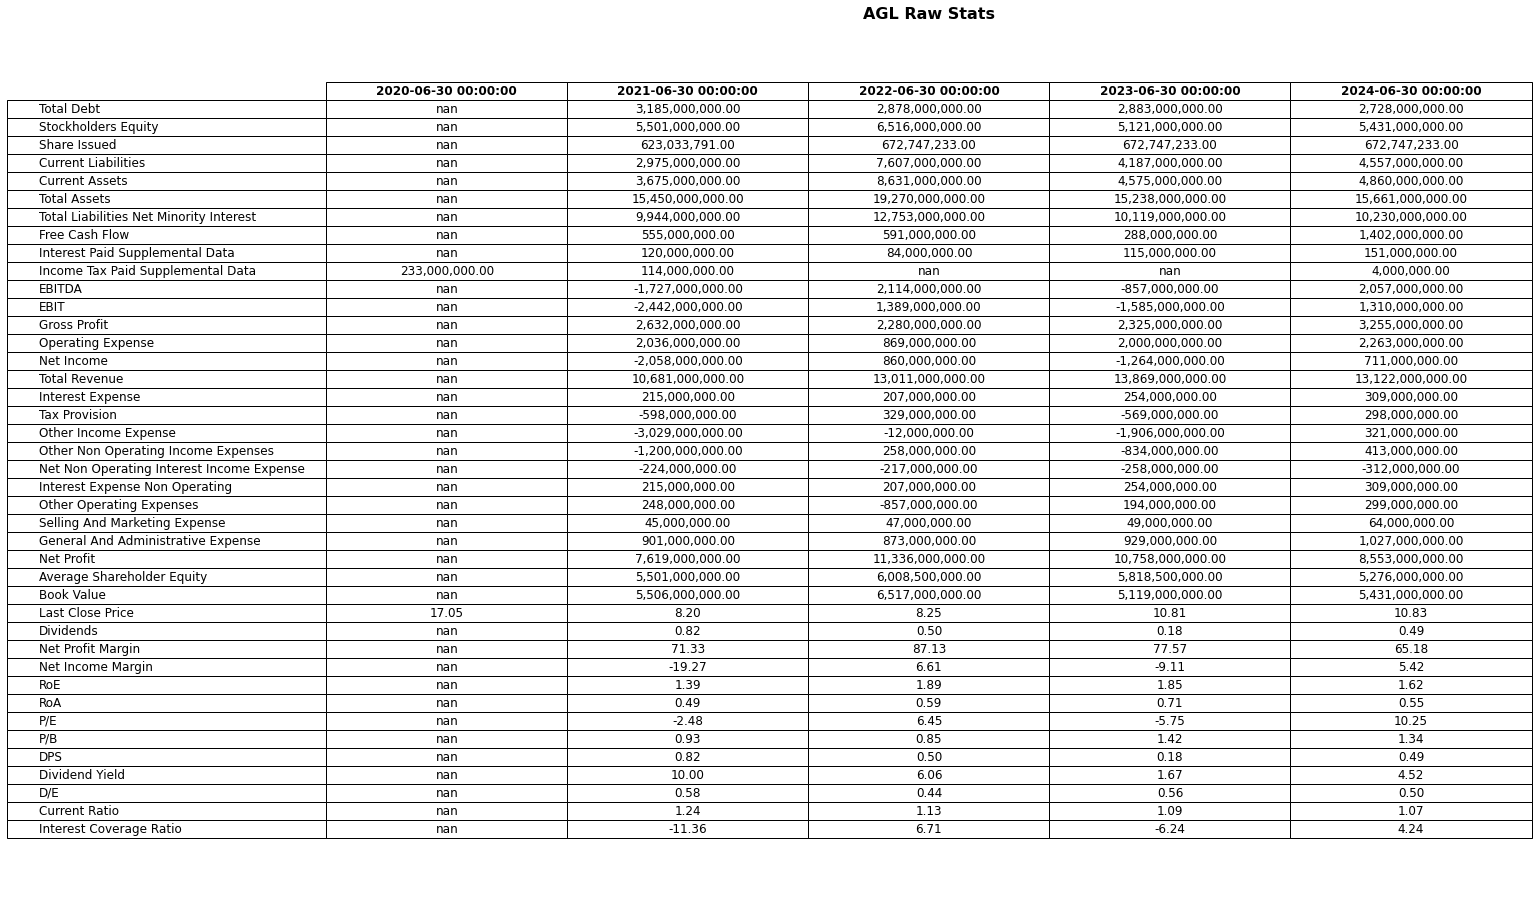

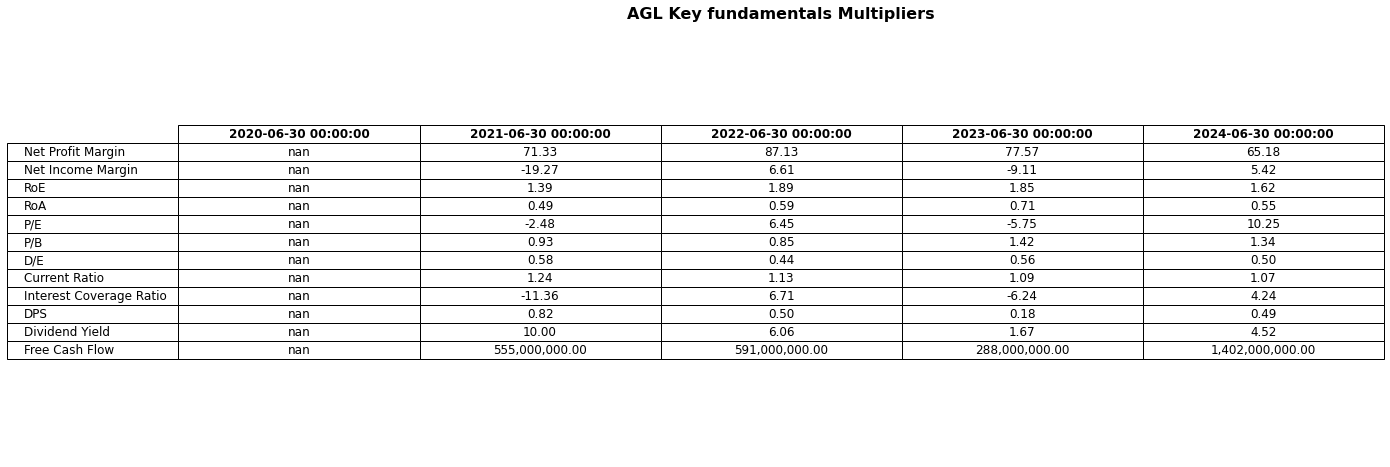

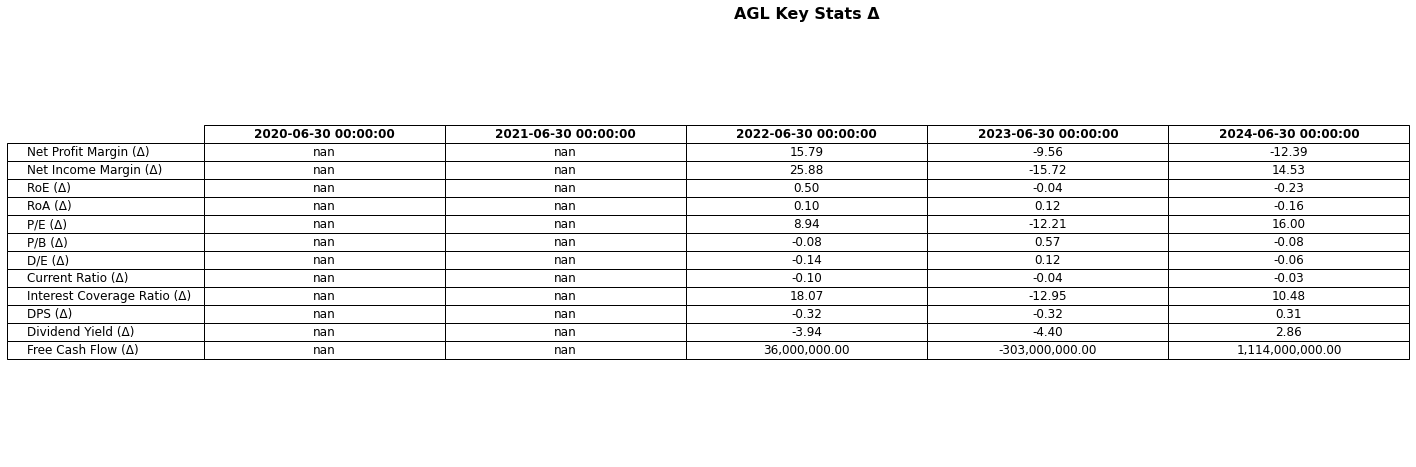


 APA
Missing data for financials table for ticker APA: 'Total Expenses'
Missing data for financials table for ticker APA: 'Selling And Marketing Expense'

 CEN
Missing data for financials table for ticker CEN: 'Total Expenses'
Missing data for financials table for ticker CEN: 'Selling And Marketing Expense'
Missing data for financials table for ticker CEN: 'General And Administrative Expense'

 GNE
Missing column from cashflow table for ticker GNE: 'Interest Paid Supplemental Data'
Missing data for financials table for ticker GNE: 'Total Expenses'
Missing data for financials table for ticker GNE: 'Selling And Marketing Expense'

 LGI
Missing data for financials table for ticker LGI: 'Total Expenses'
Missing data for financials table for ticker LGI: 'Selling And Marketing Expense'

 MCY
Missing data for financials table for ticker MCY: 'Total Expenses'
Missing data for financials table for ticker MCY: 'Selling And Marketing Expense'

 MEZ
Missing data for financials table for ticker ME

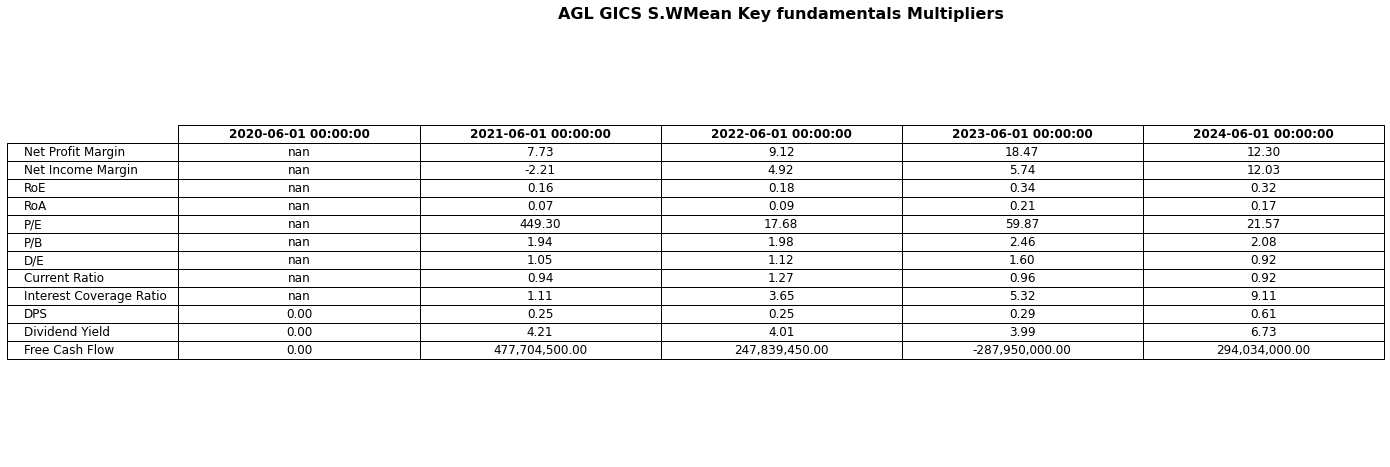

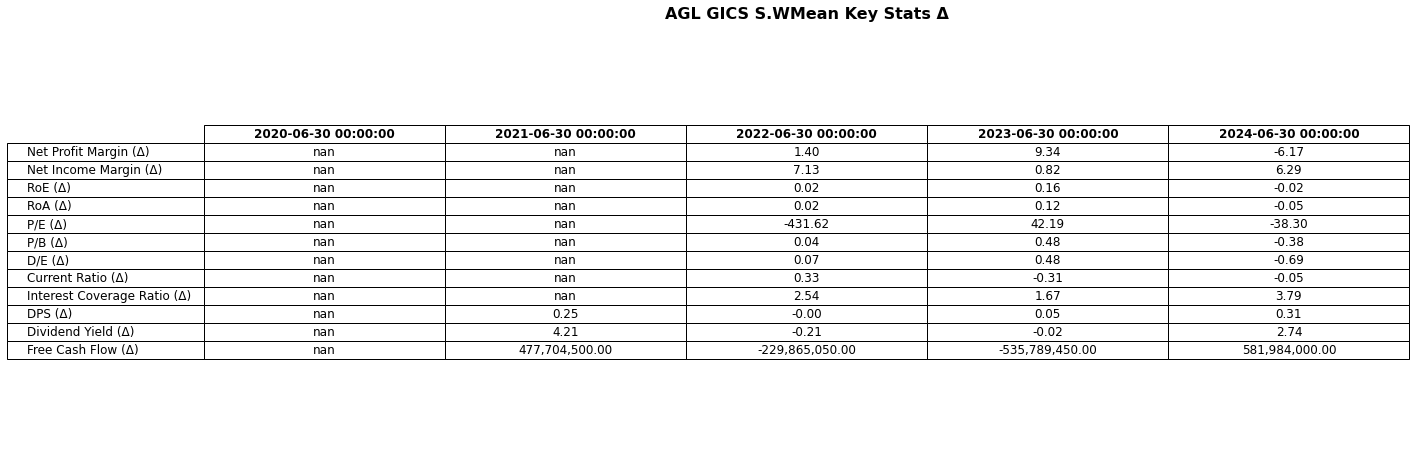

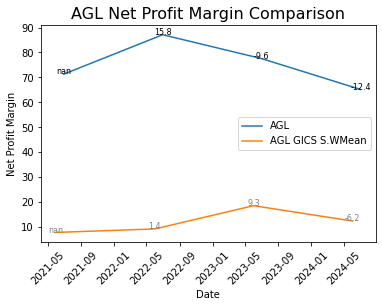

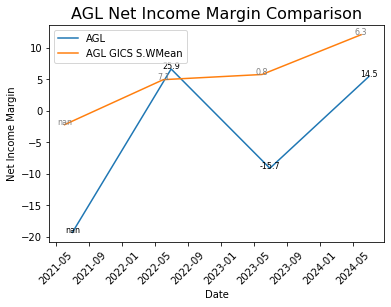

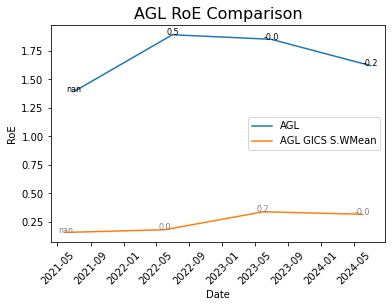

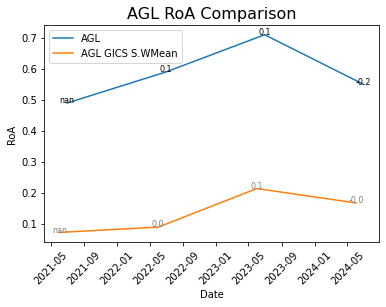

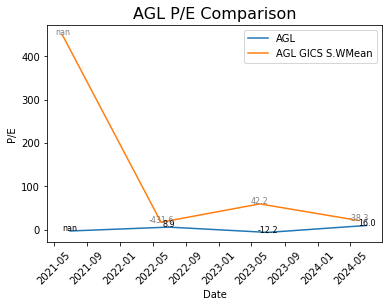

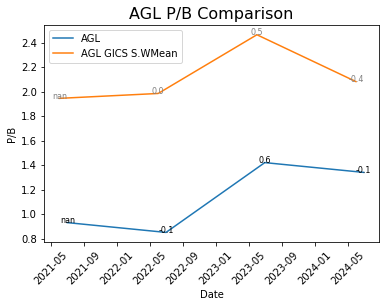

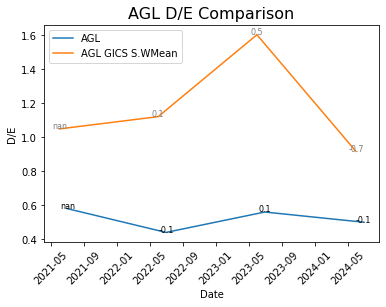

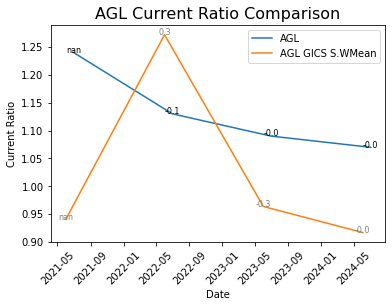

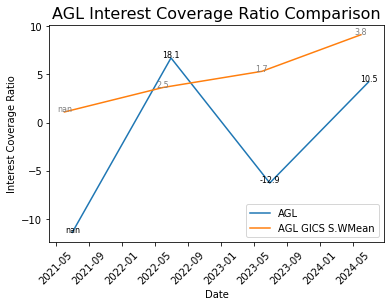

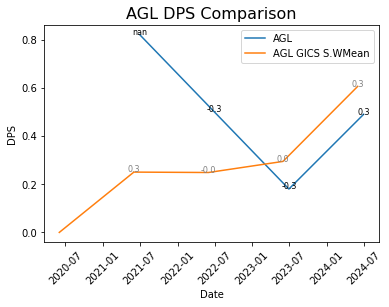

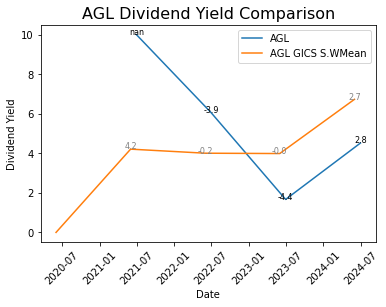

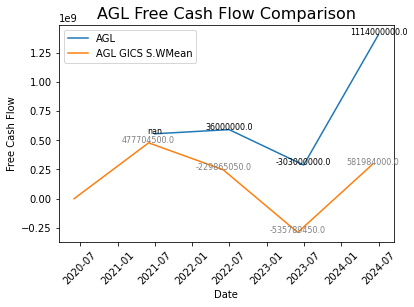

In [5]:
got_fundamentals = False

try:
    if not (MARKET == 'AU' and ASX_ticker_gics_dict['Sector'] == 'Unknown' and ASX_ticker_gics_dict['Industry'] == 'Unknown'):

        # get fundamentals for ticker of interest
        interested_ticker_raw_fundamentals_stats, \
            interested_ticker_key_interested_fundamentals_stats, \
            interested_ticker_key_interested_fundamentals_stats_diff, \
            object = get_fundamentals_dfs(
                first_end_of_quarter, historical_prices_dict,
                TICKER, MARKET)
        # create tables for fundamentals for ticker of interest
        plot_raw_fundamentals_stats_table(
            interested_ticker_raw_fundamentals_stats, TICKER)
        plot_key_fundamentals_multipliers_table(
            interested_ticker_key_interested_fundamentals_stats, TICKER)
        plot_key_fundamentals_multipliers_diff_table(
            interested_ticker_key_interested_fundamentals_stats_diff, TICKER)

        # get fundamentals for comparable tickers
        if MARKET == 'AU':

            # get raw fundamentals stats for comparable tickers
            raw_fundamentals_stats_dict, key_interested_stats_dict, object_dict = get_raw_fundamentals_stats(
                comparable_ASX_tickers_dict, first_end_of_quarter, historical_prices_dict, MARKET)

            # aggregate and integrate the fundamentals stats for comparable tickers
            agg_interpolated_fundamentals_stats_df_dict = get_agg_interpolated_fundamentals_stats(
                raw_fundamentals_stats_dict, interested_ticker_key_interested_fundamentals_stats_diff)

            # get key interested fundamental stats from the interpolated fundamentals for comparable tickers
            key_interested_fundamentals_stats_dict, key_interested_fundamentals_stats_diff_dict = get_key_interested_fundamentals_stats_for_comparable(
                agg_interpolated_fundamentals_stats_df_dict, object_dict, first_end_of_quarter, historical_prices_dict)

            # get weighted average of the key interested fundamentals stats for the GICS industry
            weighted_GICS_key_interested_fundamentals_stats = get_weighted_fundamentals(
                key_interested_fundamentals_stats_dict, same_gics_industry_weight_dict)
            weighted_GICS_key_interested_fundamentals_stats.index = weighted_GICS_key_interested_fundamentals_stats.index

            plot_key_fundamentals_multipliers_table(
                weighted_GICS_key_interested_fundamentals_stats.astype(float).round(2),  f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

            # get percentage change for key interested fundamental stats for the weighted average of the GICS industry
            weighted_GICS_key_interested_fundamentals_stats_diff = get_key_interested_fundamentals_stat_diff(
                weighted_GICS_key_interested_fundamentals_stats)
            weighted_GICS_key_interested_fundamentals_stats_diff.index = interested_ticker_key_interested_fundamentals_stats_diff.index

            plot_key_fundamentals_multipliers_diff_table(
                weighted_GICS_key_interested_fundamentals_stats_diff, f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

        else:
            weighted_GICS_key_interested_fundamentals_stats = pd.DataFrame()

        # plot the comparison of key interested fundamentals for the ticker of interest and the weighted average of the GICS industry
        plot_key_fundamentals_multipliers(
            interested_ticker_key_interested_fundamentals_stats, weighted_GICS_key_interested_fundamentals_stats, TICKER, {})

        got_fundamentals = True

except ValueError as e:
    print('Error:', e)

PDF

In [6]:
got_fundamentals

True

In [ ]:
if MARKET == 'AU' and got_fundamentals:
    # create pdf
    create_pdf(**{
        'ASX_ticker_gics_dict': ASX_ticker_gics_dict,
        'comparable_ASX_tickers_dict': comparable_ASX_tickers_dict,
        'ticker_mv_df': ticker_mv_df,
        'same_industry_tickers_mcap_df': same_industry_tickers_mcap_df,
        'got_fundamentals': got_fundamentals,
        'TICKER': TICKER,
        'MARKET': MARKET,
        'market_value_rank': market_value_rank
    })
else:
    create_pdf(**{
        'got_fundamentals': got_fundamentals,
        'TICKER': TICKER,
        'MARKET': MARKET,
    })